In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Any
import sys
import copy
import matplotlib.pyplot as plt
import itertools
from fractions import Fraction
from decimal import Decimal

from src.dataclass import (
    Input, Lattice, Parameter, Train, Save,
    Processed_Input, Topology, Conjugate, Result
)

from src.manage_data import get_result, get_correlation_length, get_label, get_list
from src.manage_data import save_result, save_log, load_result, delete_result

In [2]:
df = load_result("temp")
df.columns.values

array(['key', 'size', 'dimension', 'ghost', 'initial', 'T', 'H', 'Tc',
       'Hc', 'Jm', 'Jv', 'mode', 'variable', 'multiply', 'base',
       'exponent', 'iteration', 'sweep', 'measurement', 'interval',
       'ensemble', 'max_workers', 'threshold', 'recent', 'environment',
       'location', 'save', 'order_parameter', 'susceptibility',
       'binder_cumulant', 'spin_glass_order', 'spin_glass_suscept',
       'spin_glass_binder', 'energy', 'specific_heat',
       'irreducible_distance', 'correlation_function', 'autocorrelation',
       'time'], dtype=object)

In [3]:
df.sort_values("T", ascending=True)

,key,size,dimension,ghost,initial,T,H,Tc,Hc,Jm,...,binder_cumulant,spin_glass_order,spin_glass_suscept,spin_glass_binder,energy,specific_heat,irreducible_distance,correlation_function,autocorrelation,time
0,11ee5d,32,2,0.0,random,0.8488,0.0,0.9,0.0,1.0,...,0.655716,0.259870,1.359935,0.614318,-1.484944,1.244251,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7401298097140235, 0.48276090028668034, 0.40...","[1.0, 0.44497144339931854, 0.28511663026418144...",11
11,bb0d4e,32,2,0.0,random,0.8744,0.0,0.9,0.0,1.0,...,0.654999,0.244038,1.287922,0.615652,-1.462040,1.258091,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7559621242366303, 0.48714203250005217, 0.40...","[1.0, 0.44194383317773905, 0.2822387658423077,...",11
10,b49879,32,2,0.0,random,0.8872,0.0,0.9,0.0,1.0,...,0.654292,0.226532,1.119539,0.607955,-1.450181,1.269546,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7734675214672964, 0.4987181045261848, 0.412...","[1.0, 0.44133184269815084, 0.2807274972621197,...",11
15,f40979,32,2,0.0,random,0.8936,0.0,0.9,0.0,1.0,...,0.654099,0.210938,1.136581,0.606526,-1.444169,1.276117,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7890622482074728, 0.5113072420077918, 0.424...","[1.0, 0.44033235149242766, 0.2796787593817346,...",11
2,3cf26a,32,2,0.0,random,0.8968,0.0,0.9,0.0,1.0,...,0.653966,0.222828,1.159067,0.608859,-1.441032,1.282677,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7771719128539478, 0.49784823055147986, 0.41...","[1.0, 0.43883452532289924, 0.277390151690871, ...",11
9,b457a6,32,2,0.0,random,0.8984,0.0,0.9,0.0,1.0,...,0.654139,0.220007,1.109144,0.614660,-1.439483,1.279098,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7799930125628987, 0.4998955327059401, 0.412...","[1.0, 0.43883582032994356, 0.277923025274624, ...",11
12,ce713b,32,2,0.0,random,0.8992,0.0,0.9,0.0,1.0,...,0.654060,0.216679,1.128145,0.609816,-1.438783,1.279090,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7833205983786432, 0.5028730349151671, 0.415...","[1.0, 0.43912695375759525, 0.2776704106476785,...",11
1,3c9a1a,32,2,0.0,random,0.9008,0.0,0.9,0.0,1.0,...,0.653804,0.213801,1.103491,0.609916,-1.437255,1.284044,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7861991745350546, 0.50498787416421, 0.41721...","[1.0, 0.43815075173808654, 0.2787808004870924,...",11
8,ada16a,32,2,0.0,random,0.9016,0.0,0.9,0.0,1.0,...,0.653852,0.220379,1.096887,0.615704,-1.436439,1.283271,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.779621277661618, 0.4980020442381777, 0.4100...","[1.0, 0.4381896601665175, 0.2778227932665065, ...",11
5,55b4cb,32,2,0.0,random,0.9032,0.0,0.9,0.0,1.0,...,0.653817,0.222634,1.140155,0.610838,-1.434858,1.287550,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.7773656327578926, 0.49495529740948924, 0.40...","[1.0, 0.4360462081217247, 0.27751095290162786,...",11


In [4]:
# delete = df[(df["T"] <= 0.8)]
# np.array(delete["key"])

In [5]:
# delete_result("temp", np.array(delete["key"])) # delete "key".pkl file in "result" or "temp" folder

In [6]:
# df[(df["size"] == 8) & (df["Jv"] == 0.1)].sort_values("T", ascending=True)

In [7]:
dimension = 2

yt, yh, Tc = (1, 2.5, 0.9)
print(yt, yh, Tc)

alpha, beta, gamma, delta, nu, eta = (
    np.round(2-dimension/yt,3),
    np.round((dimension-yh)/yt,3),
    np.round((2*yh-dimension)/yt,3),
    np.round(yh/(dimension-yh),3),
    np.round(1/yt,3),
    np.round(dimension-2*yh+2,3),
)

print(alpha, beta, gamma, delta, nu, eta)

model_data = df[(df["dimension"] == dimension)] # data at same universality class (identical state and dimension)

size_list, Jv_list = (
    get_list(model_data, "size"),
    get_list(model_data, "Jv"),
)

print(size_list, Jv_list)

result = np.empty((np.size(size_list), np.size(Jv_list)), dtype=object) #! array of pd.DataFrame, index in 1-1 correspondance with size and Jv

for i, size in enumerate(size_list):
    for j, Jv in enumerate(Jv_list):
        result[i, j] = get_result(df, dimension, size, Jv)

# print(result[size_list.index(64),Jv_list.index(0.0)].order_parameter)

1 2.5 0.9
0.0 -0.5 3.0 -5.0 1.0 -1.0
[32] [0.0]


In [8]:
# data

In [9]:
# !rm -rf ./result/000000.pkl

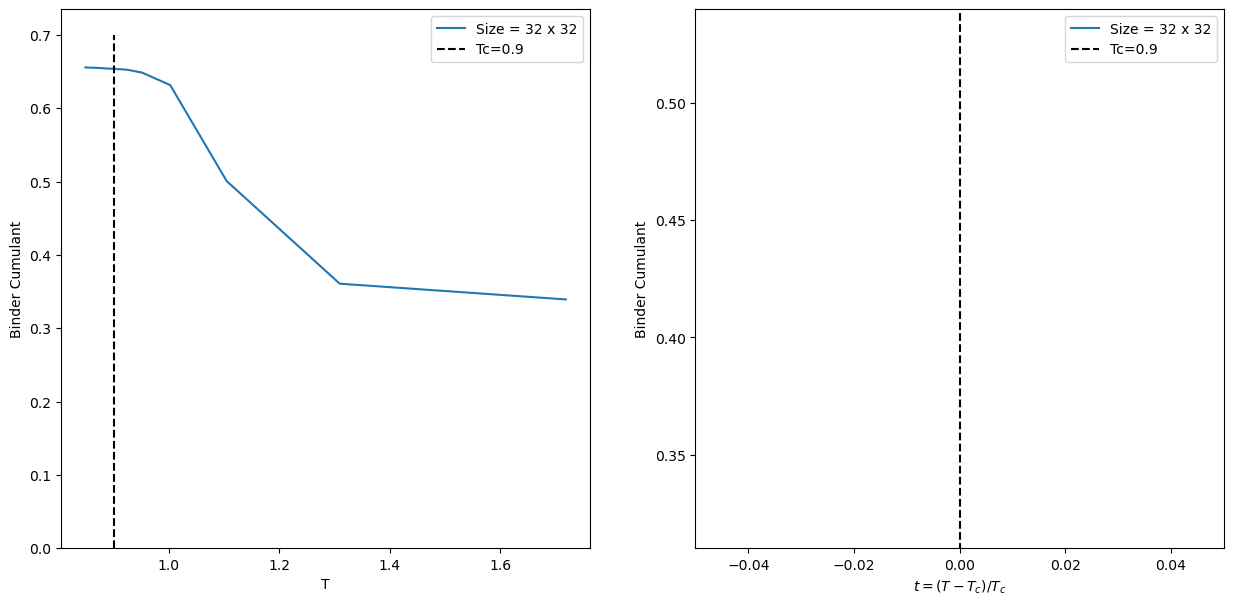

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Tc = 1.492

Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.binder_cumulant, label=get_label(data, "size"))
    ax[1].plot((data.temperature-Tc)/Tc, data.binder_cumulant, label=get_label(data, "size"))
    
ax[0].vlines(Tc, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")
ax[1].vlines(0, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Binder Cumulant")
ax[1].legend(loc="best")
ax[1].set_xlabel(r"$t=(T-T_c)/T_c$")
ax[1].set_xlim([-0.05, 0.05])
ax[1].set_ylim([0.31, 0.54])
ax[1].set_ylabel("Binder Cumulant")

plt.legend()
plt.show()

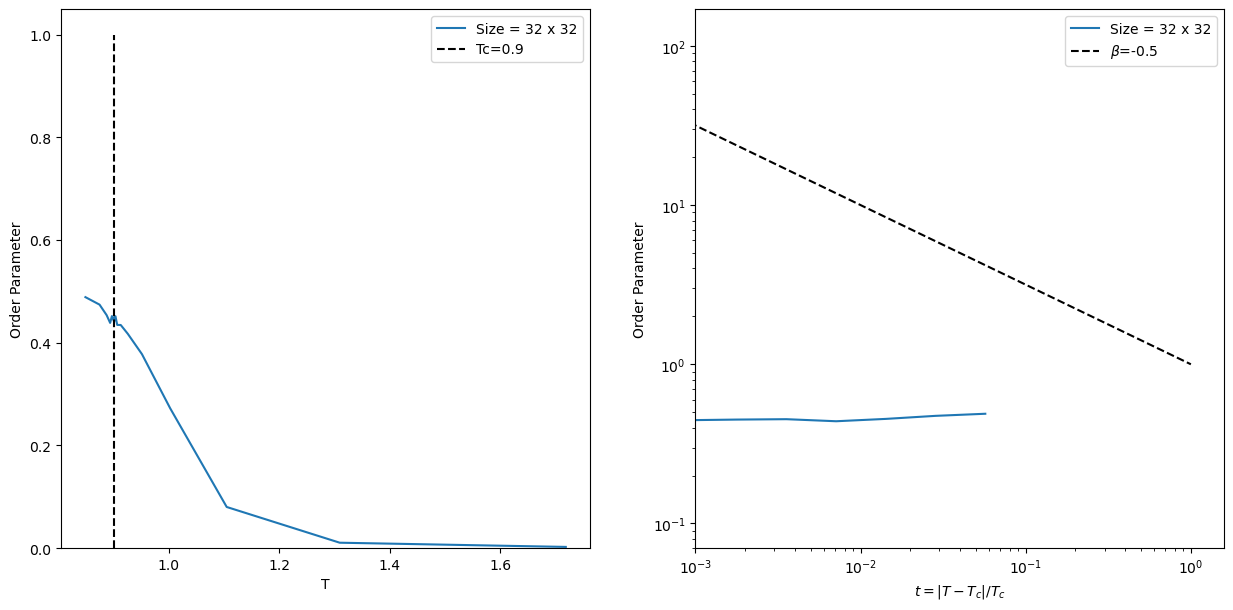

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Tc = 1.492
# beta = 1/9

Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.order_parameter, label=get_label(data, "size"))
    ax[1].plot((Tc-data.temperature)/Tc, data.order_parameter, label=get_label(data, "size"))

ax[0].vlines(Tc, 0, 1, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(beta)
x = np.linspace(0.0001, 1, 100)
ax[1].plot(x, g(x), "--", color="k", label = fr"$\beta$={beta}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Order Parameter")

ax[1].legend(loc="best")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t=|T-T_c|/T_c$")
ax[1].set_ylabel("Order Parameter")
ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([7.e-2, None])

plt.legend()
plt.show()

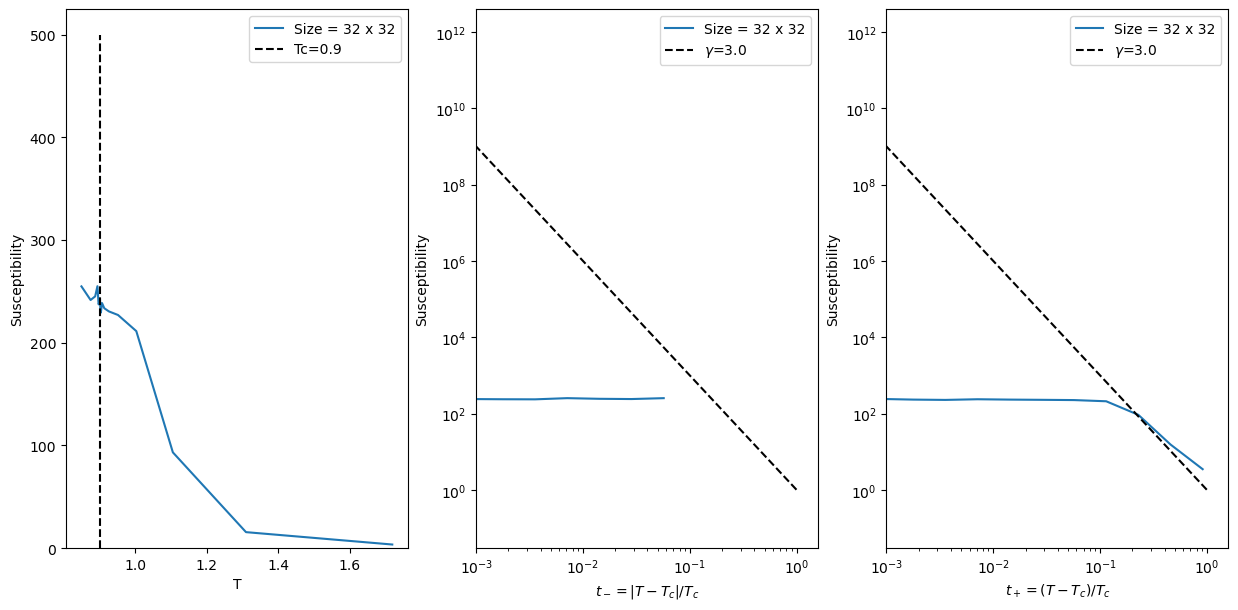

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Tc = 1.492
# gamma = 13/9

Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.susceptibility, label=get_label(data, "size"))
    ax[1].plot((Tc-data.temperature)/Tc, data.susceptibility, label=get_label(data, "size"))
    ax[2].plot((data.temperature-Tc)/Tc, data.susceptibility, label=get_label(data, "size"))

ax[0].vlines(Tc, 0, 500, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-gamma)
x = np.linspace(0.0001, 1, 100)
ax[1].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")
ax[2].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Susceptibility")

ax[1].legend(loc="best")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Susceptibility")
ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([3.e-2, None])

ax[2].legend(loc="best")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax[2].set_ylabel("Susceptibility")
ax[2].set_xlim([1.e-3, None])
ax[2].set_ylim([3.e-2, None])

plt.legend()
plt.show()

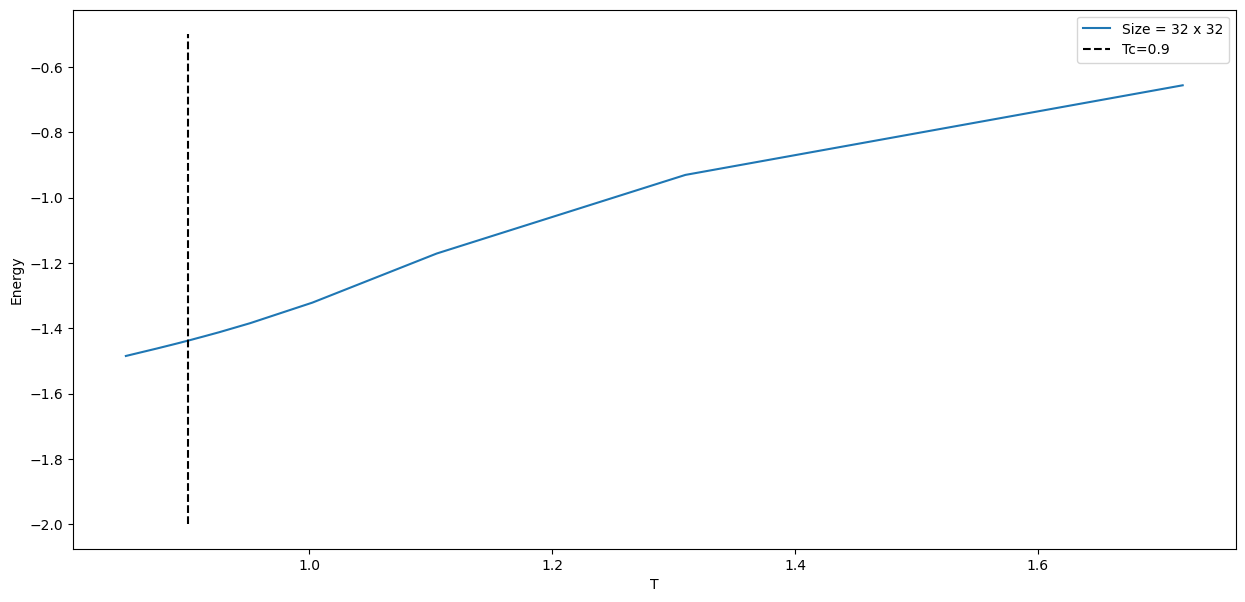

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

# Tc = 1.492

Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    ax.plot(data.temperature, data.energy, label=get_label(data, "size"))

ax.vlines(Tc, -2, -0.5, linestyle="--", color="k", label=f"Tc={Tc}")

# ax.set_ylim([-2, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Energy")

plt.legend()
plt.show()

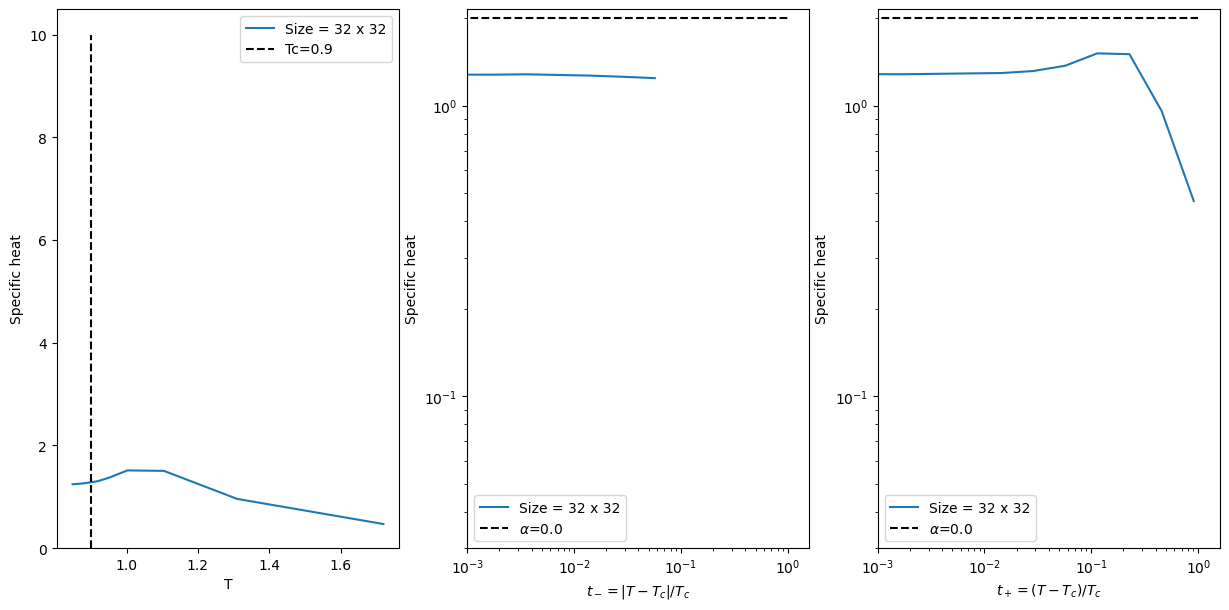

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Tc = 1.492
# alpha = 1/3

for data in result[:, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.specific_heat, label=get_label(data, "size"))
    ax[1].plot((Tc-data.temperature)/Tc, data.specific_heat, label=get_label(data, "size"))
    ax[2].plot((data.temperature-Tc)/Tc, data.specific_heat, label=get_label(data, "size"))

ax[0].vlines(Tc, 0, 10, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return 2 * x**(-alpha)
x = np.linspace(0.0001, 1, 100)
ax[1].plot(x, g(x), "--", color = "black", label = fr"$\alpha$={alpha}")
ax[2].plot(x, g(x), "--", color = "black", label = fr"$\alpha$={alpha}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Specific heat")

ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Specific heat")
ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([3.e-2, None])
ax[1].legend(loc="lower left")

ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax[2].set_ylabel("Specific heat")
ax[2].set_xlim([1.e-3, None])
ax[2].set_ylim([3.e-2, None])
ax[2].legend(loc="lower left")

plt.show()

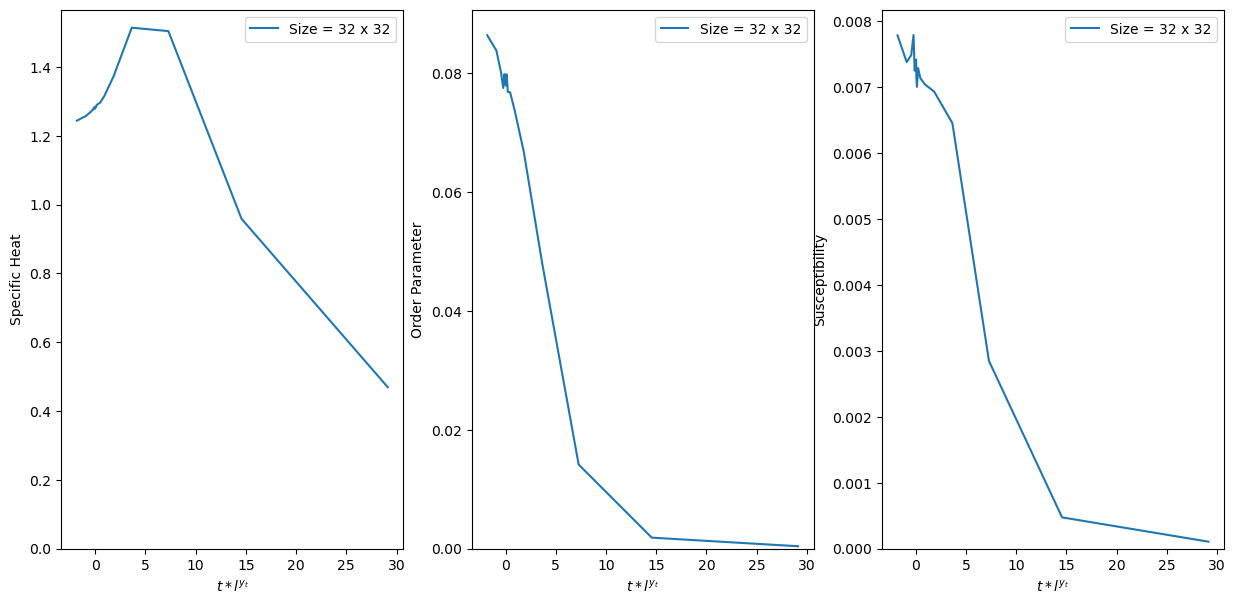

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Tc = 1.492
# alpha = 1/3

Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    ax[0].plot((data.temperature-Tc)/Tc*data.size**yt, data.specific_heat*data.size**(data.dimension-2*yt), label=get_label(data, "size"))
    ax[1].plot((data.temperature-Tc)/Tc*data.size**yt, data.order_parameter*data.size**(data.dimension-yh), label=get_label(data, "size"))
    ax[2].plot((data.temperature-Tc)/Tc*data.size**yt, data.susceptibility*data.size**(data.dimension-2*yh), label=get_label(data, "size"))

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel(r"$t*l^{y_t}$")
ax[0].set_ylabel("Specific Heat")

ax[1].set_ylim([0, None])
ax[1].legend(loc="best")
ax[1].set_xlabel(r"$t*l^{y_t}$")
ax[1].set_ylabel("Order Parameter")

ax[2].set_ylim([0, None])
ax[2].legend(loc="best")
ax[2].set_xlabel(r"$t*l^{y_t}$")
ax[2].set_ylabel("Susceptibility")

plt.show()

ValueError: 16 is not in list

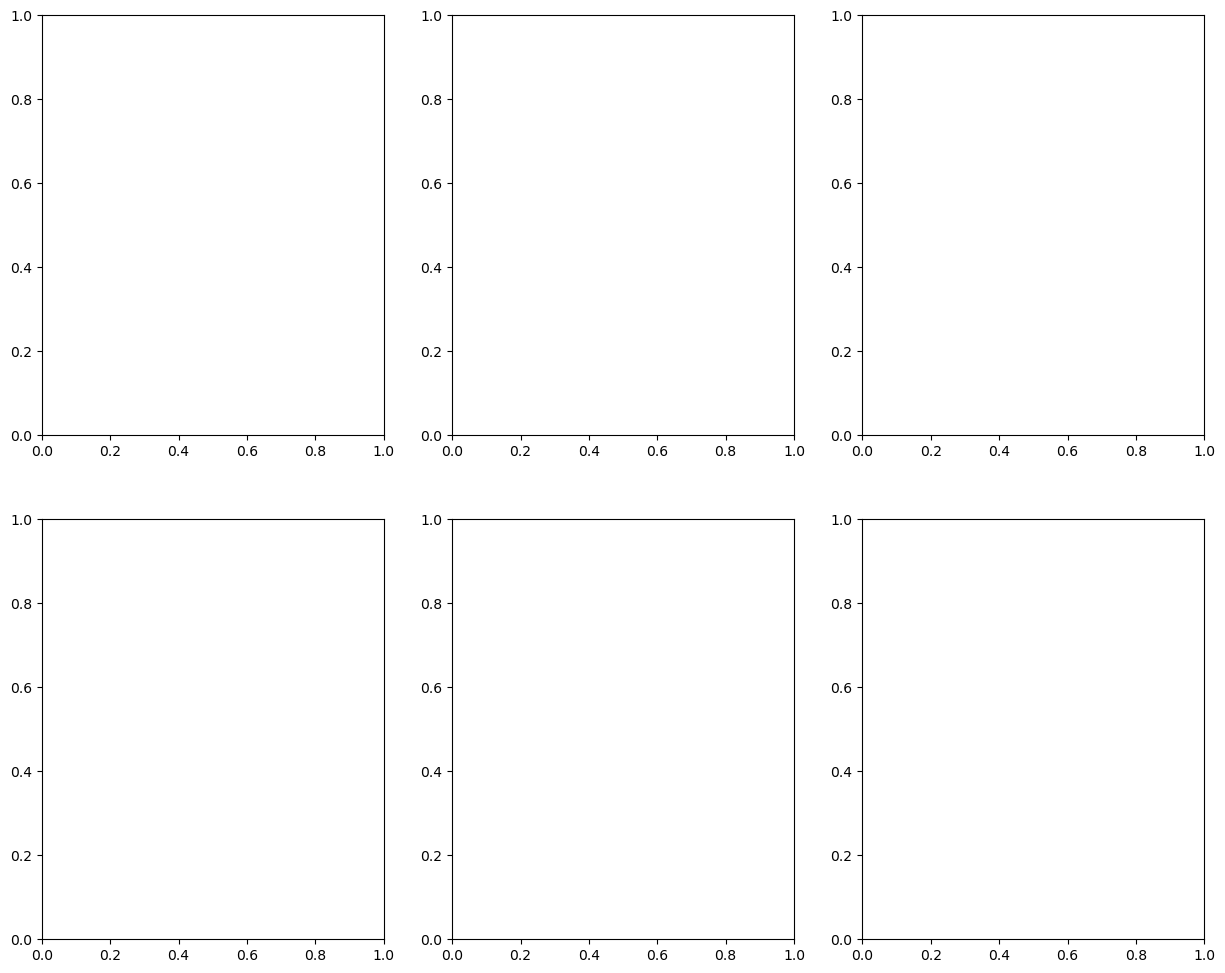

In [16]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: "{:.8g}".format(y))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))

Jv = 0.0

for i, data in enumerate(result[size_list.index(16):size_list.index(16)+1, Jv_list.index(Jv)]):
    for j, irr_dist in enumerate(data.irreducible_distance):
        ax[0,i].plot(irr_dist, data.correlation_function[j])
        ax[1,i].plot(irr_dist, data.correlation_function[j])
    
    def g(x):
        return 1/x**(dimension-2+eta)
    x = np.arange(2,data.size/2)
    ax[1,i].plot(x,g(x),"--",color="k", label=fr"$\eta$={eta}")

    ax[0,i].set_yscale("log")
    ax[0,i].set_xlim(0, data.size*data.dimension/2)
    ax[0,i].set_ylim(3.e-7, 1.)
    ax[0,i].set_xlabel("|i-j|")
    ax[0,i].set_ylabel(f"Correlation Function, {get_label(data, 'size')}")
    
    ax[1,i].loglog()
    ax[1,i].set_xlim(1, data.size*data.dimension/2)
    ax[1,i].set_ylim(0.31, 1.)
    ax[1,i].legend(loc="best")
    ax[1,i].set_xlabel("|i-j|")
    ax[1,i].set_ylabel(f"Correlation Function, {get_label(data, 'size')}")
    
    ax[1,i].xaxis.set_major_formatter(formatter)
    # ax[1,i].xaxis.set_minor_formatter(formatter)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].yaxis.set_minor_formatter(formatter)

# plt.legend()
plt.show()

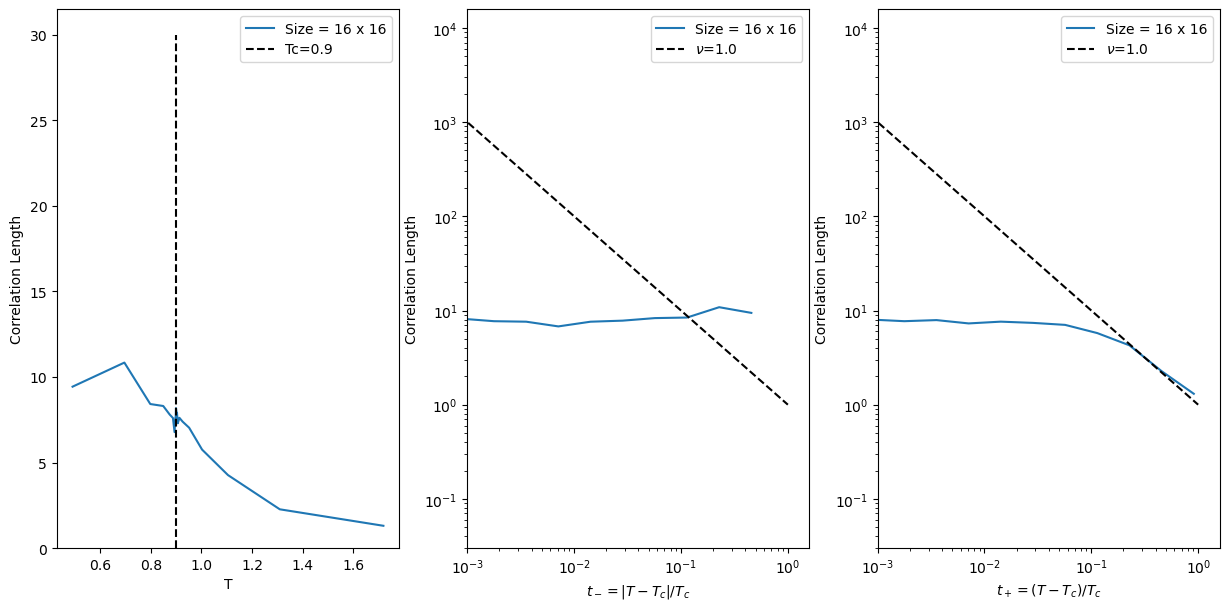

In [ ]:
Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    data.correlation_length = get_correlation_length(data)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

for data in result[size_list.index(16):size_list.index(16)+1, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.correlation_length, label=get_label(data, "size"))
    ax[1].plot((Tc-data.temperature)/Tc, data.correlation_length, label=get_label(data, "size"))
    ax[2].plot((data.temperature-Tc)/Tc, data.correlation_length, label=get_label(data, "size"))

ax[0].vlines(Tc, 0, 30, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-nu)
x = np.linspace(0.0001, 1, 100)
ax[1].plot(x, g(x), "--", color="k", label = fr"$\nu$={nu}")
ax[2].plot(x, g(x), "--", color="k", label = fr"$\nu$={nu}")

ax[0].legend(loc="best")
ax[0].set_ylim([0, None])
ax[0].set_xlabel("T")
ax[0].set_ylabel("Correlation Length")

ax[1].legend(loc="best")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Correlation Length")
ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([3.e-2, None])

ax[2].legend(loc="best")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax[2].set_ylabel("Correlation Length")
ax[2].set_xlim([1.e-3, None])
ax[2].set_ylim([3.e-2, None])

plt.legend()
plt.show()

In [ ]:
# x_min, x_max = (1, size/max(16/np.sqrt(size),8))

# measure_eta = []

# for i, distance_list in enumerate(np.array(corr["irreducible_distance"])):
#     correlation = np.array(corr["correlation_function"])[i]
#     x, y = [], []
#     for j, distance in enumerate(distance_list):
#         if(x_min <= distance <= x_max):
#             x.append(np.log(distance))
#             y.append(np.log(correlation[j]))
    
#     x, y = np.array(x).reshape((-1, 1)), np.array(y)
    
#     # print(x, y)
#     model = LinearRegression().fit(x, y)
#     measure_eta.append(2-dimension-model.coef_)

# measure_eta = np.average(measure_eta)

# print(f"measure eta = {measure_eta}")
# print(f"real eta: {eta}")

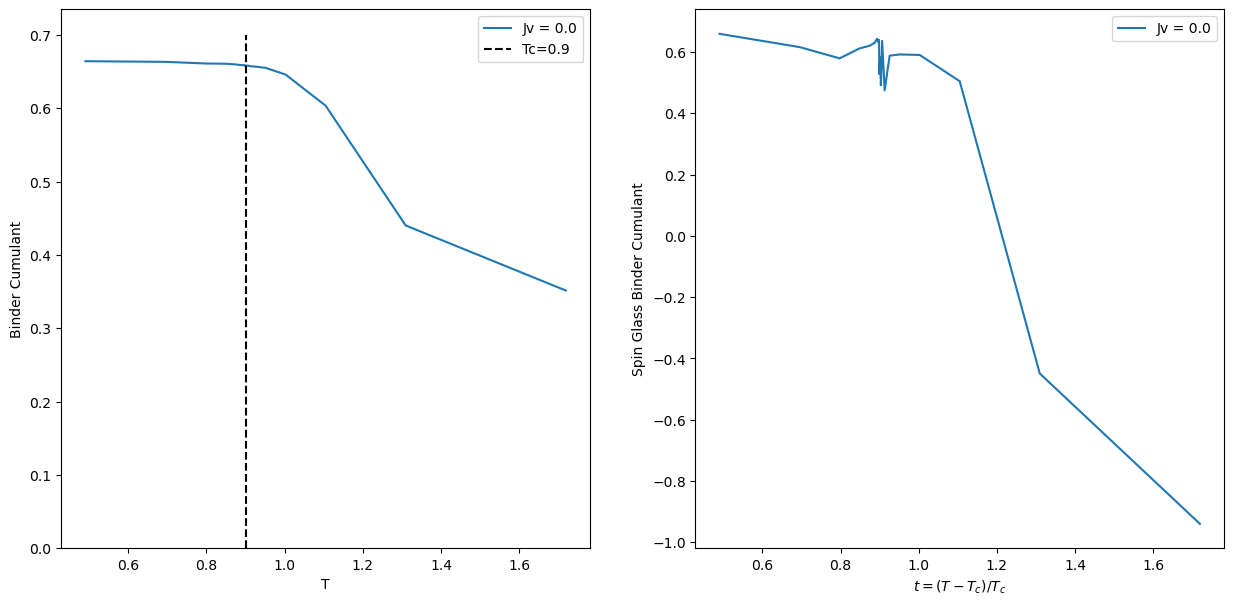

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.binder_cumulant, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_binder, label=get_label(data, "Jv"))
    
ax[0].vlines(Tc, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")
# ax[1].vlines(0, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Binder Cumulant")
ax[1].legend(loc="best")
ax[1].set_xlabel(r"$t=(T-T_c)/T_c$")
# ax[1].set_xlim([-0.05, 0.05])
# ax[1].set_ylim([0.31, 0.54])
ax[1].set_ylabel("Spin Glass Binder Cumulant")

plt.legend()
plt.show()

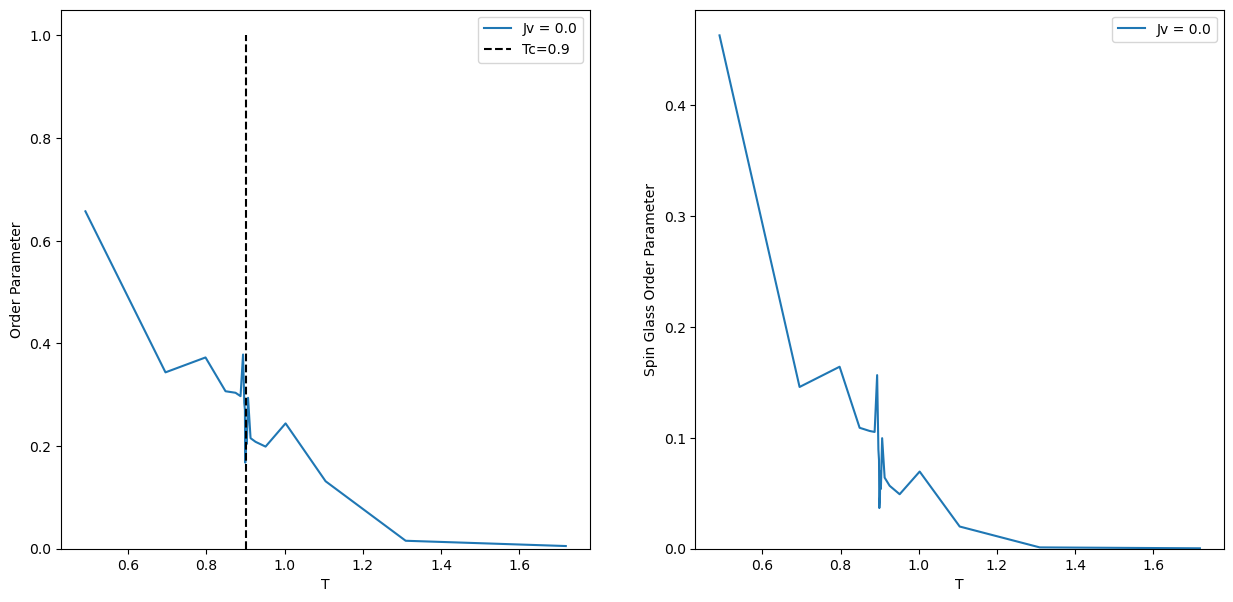

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.order_parameter, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_order, label=get_label(data, "Jv"))

ax[0].vlines(Tc, 0, 1, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(beta)
x = np.linspace(0.0001, 1, 100)
# ax[1].plot(x, g(x), "--", color="k", label = fr"$\beta$={beta}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Order Parameter")

ax[1].legend(loc="best")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
# ax[1].set_xlabel(r"$t=|T-T_c|/T_c$")
ax[1].set_xlabel("T")
ax[1].set_ylabel("Spin Glass Order Parameter")
# ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([0, None])

plt.legend()
plt.show()

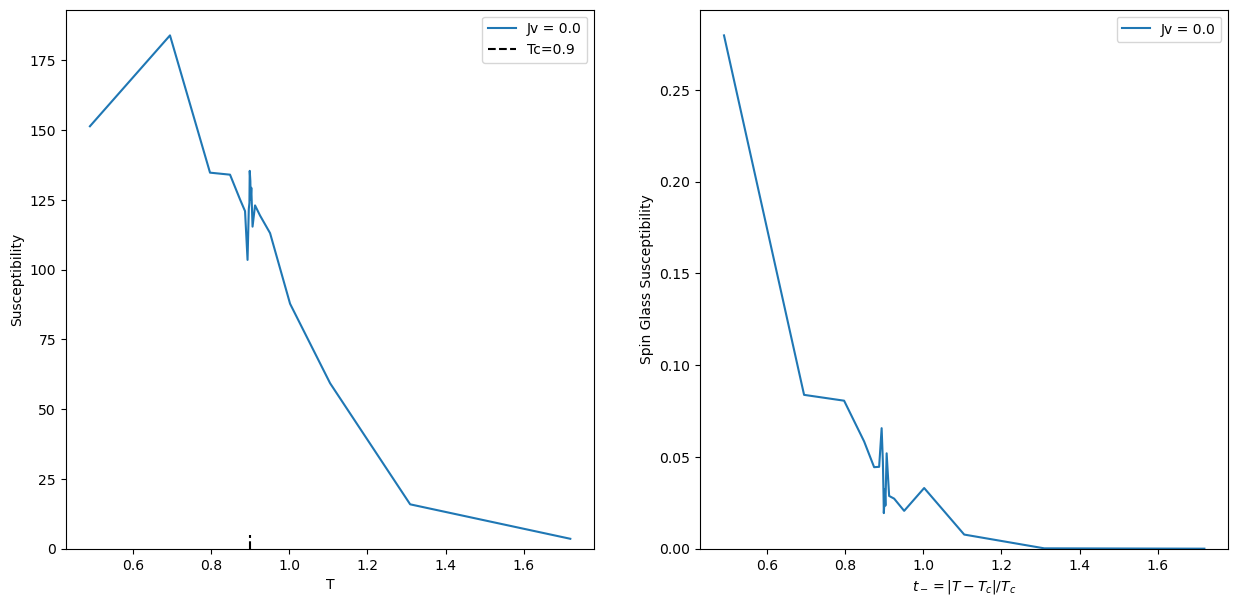

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.susceptibility, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_suscept, label=get_label(data, "Jv"))

ax[0].vlines(Tc, 0, 5, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-gamma)
x = np.linspace(0.0001, 1, 10)
# ax[1].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")
# ax[2].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Susceptibility")

ax[1].legend(loc="best")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Spin Glass Susceptibility")
# ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([0.e-2, None])

plt.legend()
plt.show()

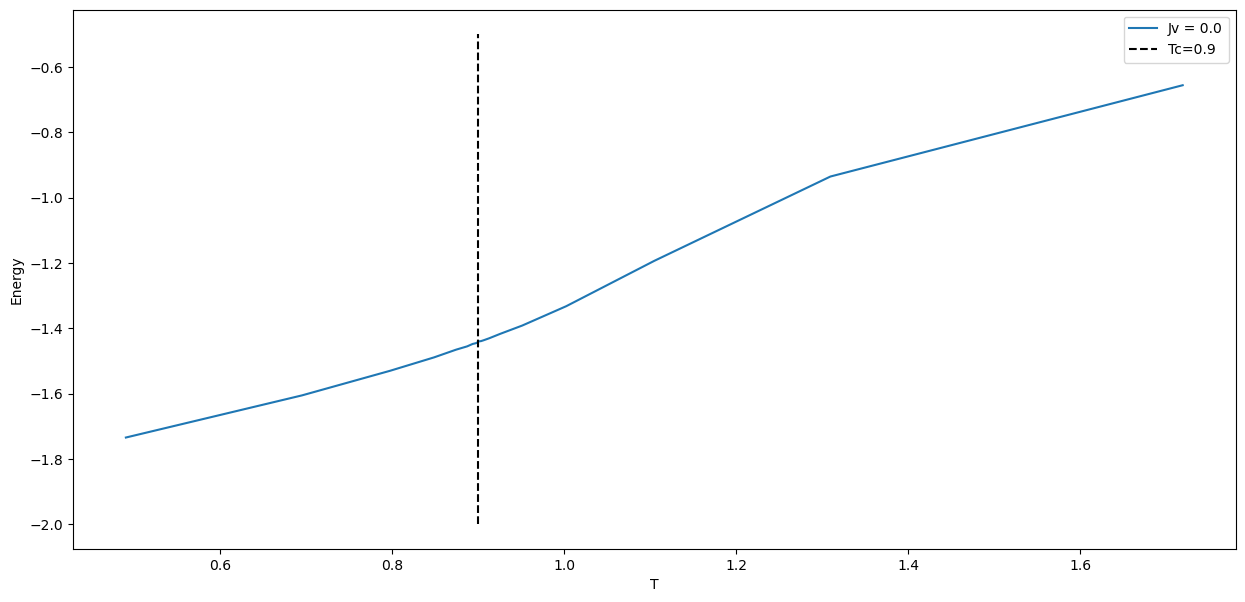

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax.plot(data.temperature, data.energy, label=get_label(data, "Jv"))

ax.vlines(Tc, -2, -0.5, linestyle="--", color="k", label=f"Tc={Tc}")

# ax.set_ylim([-2, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Energy")

plt.legend()
plt.show()

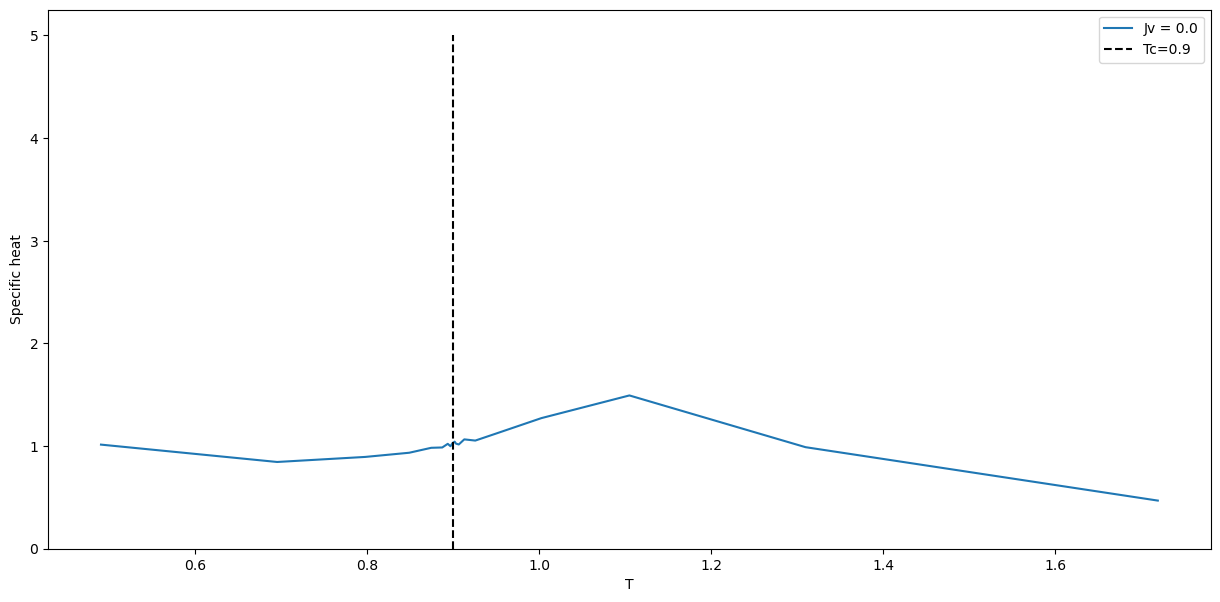

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax.plot(data.temperature, data.specific_heat, label=get_label(data, "Jv"))

ax.vlines(Tc, 0, 5, linestyle="--", color="k", label=f"Tc={Tc}")


ax.set_ylim([0, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Specific heat")

plt.show()